# Tarea 10
## Linear regression

In [3]:
import pandas as pd
CO2Data = pd.read_csv("data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

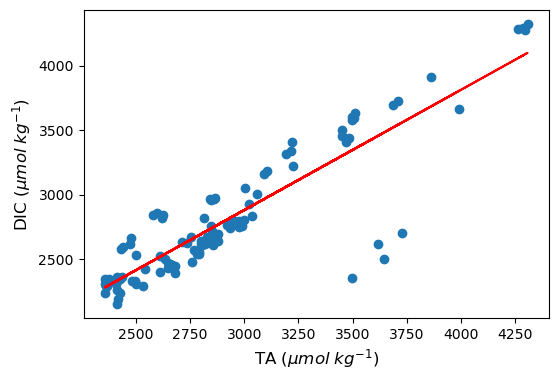

Slope: 0.9329743239047245


In [4]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

plt.scatter(x, y, label='original data')

plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.gcf().set_size_inches(6, 4)

import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [5]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.7784247010713174
p_value: 8.179416835110045e-36
slope: 0.9329743239047245
intercept: 80.30614134209554


In [6]:
import statsmodels.api as sm
import numpy as np

x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     365.4
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           8.18e-36
Time:                        19:39:35   Log-Likelihood:                -728.75
No. Observations:                 106   AIC:                             1462.
Df Residuals:                     104   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             80.3061    144.021      0.

In [7]:
print("\n=== MODEL INTERPRETATION ===\n")

r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0] 

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.778
✔️ Good model fit: Explains most of the variance.

Coefficients:
- const: Coef = 80.3061, p = 0.5783 → ⚠️ Not significant (p ≥ 0.05)
- ta_micromol_kg: Coef = 0.9330, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (ta_micromol_kg): 0.9330, p = 0.0000 → ✔️ Significant

Standard Error of the model: 236.4180


## Perform linear regressions of salinity vs temperature and dec vs salinity.

In [8]:
CO2Data.columns

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

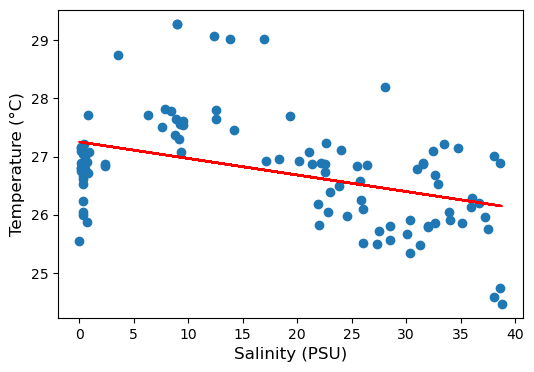

Slope: -0.028458717486946162


In [9]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['sal_psu']
y = CO2Data['temp_c']

plt.scatter(x, y, label='original data')

plt.xlabel('Salinity (PSU)', fontsize = 12, )
plt.ylabel('Temperature (°C)', fontsize = 12)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.gcf().set_size_inches(6, 4)

import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [10]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -0.028458717486946162
intercept: 27.25200067150795


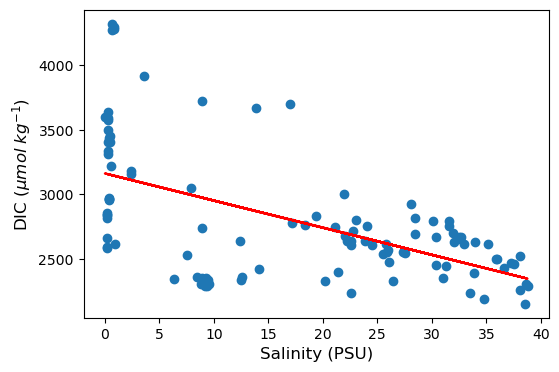

Slope: -21.053197646779633


In [11]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['sal_psu']
y = CO2Data['dic_micromol_kg']

plt.scatter(x, y, label='original data')

plt.xlabel('Salinity (PSU)', fontsize = 12, )
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.gcf().set_size_inches(6, 4)

import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [12]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -21.053197646779633
intercept: 3162.874756459312
